In [1]:
import joblib
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

In [2]:
ROOT = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(ROOT, 'data', 'processed')
MODELS_PATH = os.path.join(ROOT, 'models')

In [3]:
# Load Models
logistic_model = joblib.load(os.path.join(MODELS_PATH, 'logistic_regression.pkl'))
# models.append(joblib.load(os.path.join(MODELS_PATH, 'handmade_logistic_regression.pkl')))
nn_model = load_model(os.path.join(MODELS_PATH, 'nn_model.keras'))

C:\Users\mokko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
df = pd.read_csv(os.path.join(DATA_PATH, 'processed.csv'))

In [5]:
x = df.drop(columns=['Class'])
y = df['Class']

In [6]:
logistic_pred = logistic_model.predict(x)
nn_pred = nn_model.predict(x)
nn_pred_class = (nn_pred > 0.5).astype(int)

C:\Users\mokko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


8867/8867 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


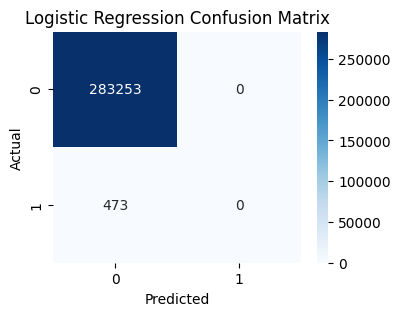

In [7]:
cm = confusion_matrix(y, logistic_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

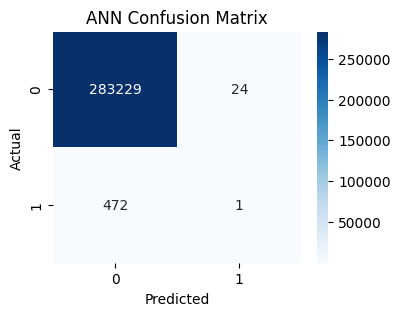

In [8]:
cm = confusion_matrix(y, nn_pred_class)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"ANN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()